<a href="https://colab.research.google.com/github/hpoddar2810/Data_Science_projects/blob/master/Lucifer_series/Lucifer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from bs4 import BeautifulSoup as bts
from requests import get
import pandas as pd

url = "https://www.imdb.com/title/tt4052886/episodes?season="
li = []

for i in range(1,6):
    response = get(url + str(i))

    html_soup = bts(response.text, 'html.parser')

    episodes_container = html_soup.find_all('div', class_="list_item")

    for epi, episodes in enumerate(episodes_container):
        if i == 5 and epi > 7:
          break
        info = episodes.find('div', class_='info')
        name = info.strong.a.text
        date_ = info.find('div', class_='airdate').text
        rating = info.find('span', class_='ipl-rating-star__rating').text
        reviews = info.find('span', class_='ipl-rating-star__total-votes').text
        
        li.append([name, i, epi+1, date_, rating, reviews])

data = pd.DataFrame(li, columns=['name', 'season', 'episode', 'date_of_release', 'ratings', 'reviews'])

data.head()

,name,season,episode,date_of_release,ratings,reviews
0,Pilot,1,1,\n 1 Sep. 2017\n,8.8,"(7,730)"
1,"Lucifer, Stay. Good Devil.",1,2,\n 1 Feb. 2016\n,8.3,"(5,175)"
2,The Would-Be Prince of Darkness,1,3,\n 8 Feb. 2016\n,8.2,"(4,649)"
3,Manly Whatnots,1,4,\n 15 Feb. 2016\n,8.6,"(4,569)"
4,Sweet Kicks,1,5,\n 22 Feb. 2016\n,8.1,"(4,169)"


In [ ]:
def remove_end(date1):
  return date1.strip()

In [ ]:
data.date_of_release = data['date_of_release'].apply(remove_end)

In [ ]:
data.head()

,name,season,episode,date_of_release,ratings,reviews
0,Pilot,1,1,1 Sep. 2017,8.8,"(7,730)"
1,"Lucifer, Stay. Good Devil.",1,2,1 Feb. 2016,8.3,"(5,175)"
2,The Would-Be Prince of Darkness,1,3,8 Feb. 2016,8.2,"(4,649)"
3,Manly Whatnots,1,4,15 Feb. 2016,8.6,"(4,569)"
4,Sweet Kicks,1,5,22 Feb. 2016,8.1,"(4,169)"


In [ ]:
def remove_str(review):
  li = [ (',', ''), ('(', ''), (')', '')]
  for l in li:
    review = review.replace(*l)
  return review

In [ ]:
data.reviews = data['reviews'].apply(remove_str)
data.head()

,name,season,episode,date_of_release,ratings,reviews
0,Pilot,1,1,1 Sep. 2017,8.8,7730
1,"Lucifer, Stay. Good Devil.",1,2,1 Feb. 2016,8.3,5175
2,The Would-Be Prince of Darkness,1,3,8 Feb. 2016,8.2,4649
3,Manly Whatnots,1,4,15 Feb. 2016,8.6,4569
4,Sweet Kicks,1,5,22 Feb. 2016,8.1,4169


In [ ]:
data.date_of_release = pd.to_datetime(data.date_of_release)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             75 non-null     object        
 1   season           75 non-null     int64         
 2   episode          75 non-null     int64         
 3   date_of_release  75 non-null     datetime64[ns]
 4   ratings          75 non-null     object        
 5   reviews          75 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 3.6+ KB


In [ ]:
data.ratings = data['ratings'].astype(float)
data.reviews = data['reviews'].astype(int)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   name             75 non-null     object        
 1   season           75 non-null     int64         
 2   episode          75 non-null     int64         
 3   date_of_release  75 non-null     datetime64[ns]
 4   ratings          75 non-null     float64       
 5   reviews          75 non-null     int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 3.6+ KB


In [ ]:
data.head()

,name,season,episode,date_of_release,ratings,reviews
0,Pilot,1,1,2017-09-01,8.8,7730
1,"Lucifer, Stay. Good Devil.",1,2,2016-02-01,8.3,5175
2,The Would-Be Prince of Darkness,1,3,2016-02-08,8.2,4649
3,Manly Whatnots,1,4,2016-02-15,8.6,4569
4,Sweet Kicks,1,5,2016-02-22,8.1,4169


In [ ]:
#data.to_csv("lucifer_episodes_ratings.csv", index=False)

In [ ]:
epi_count = data.groupby(['season']).episode.count()
seasonwise = data.groupby(['season'])

In [ ]:
max_rating = seasonwise.ratings.max()
min_rating = seasonwise.ratings.min()
avg_rating = seasonwise.ratings.mean() 
max_id = seasonwise.ratings.idxmax()
min_id = seasonwise.ratings.idxmin()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse
import seaborn as sns
%matplotlib inline


In [ ]:
sns.set_style("darkgrid")

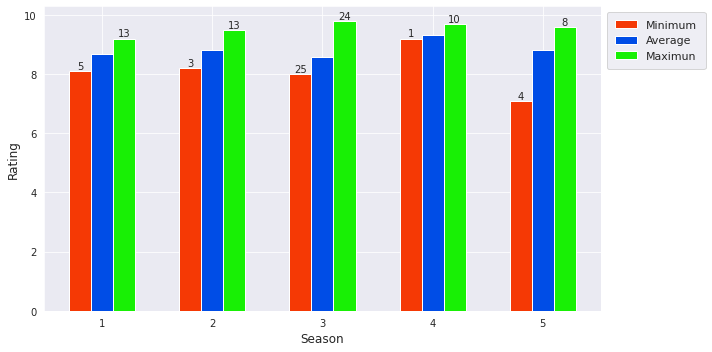

In [ ]:
plt.figure(figsize=(10,5))
label = np.arange(1,6)
width = 0.2
bar1 = plt.bar(label-width, min_rating, width=width, color='#f53905', label='Minimum')
bar2 = plt.bar(label, avg_rating, width=width, color='#004de6', label='Average')
bar3 = plt.bar(label+width, max_rating, width=width, color='#18f005', label='Maximun')
ax = plt.gca()
# x0, y0 = ax.transAxes.transform((0, 0)) # lower left in pixels
# x1, y1 = ax.transAxes.transform((1, 1)) # upper right in pixes
# dx = x1 - x0
# dy = y1 - y0
# maxd = max(dx, dy)
# width = .14 * maxd / dx
# height = .21 * maxd / dy
# for i in range(1,6):
#   ci = Ellipse((i-width-0.065,min_rating[i]+.16), width, height, color='k', fill=False, label='episode')
#   ci1 = Ellipse((i+width+0.065,max_rating[i]+.18), width, height, color='k', fill=False)
#   ax.add_artist(ci)
#   ax.add_artist(ci1)
def filltext(bars, ind):
  for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, '%d' % int(ind[i]), ha='center', va='bottom')

min_rating_epi = data.loc[min_id, 'episode'].reset_index(drop=True)
max_rating_epi = data.loc[max_id, 'episode'].reset_index(drop=True)

filltext(bar1, min_rating_epi)
filltext(bar3, max_rating_epi)
plt.xlabel('Season', fontsize=12)
plt.ylabel('Rating',fontsize=12)
plt.legend(bbox_to_anchor=(1.001, 1), loc='upper left', fontsize=11, borderpad=0.75)
plt.tight_layout()
plt.show()

In [ ]:
data1 = data[['season','episode', 'ratings']]
data1.set_index(['season', 'episode'], inplace=True)
data1.head()

ratings
season episode         
1      1            8.8
       2            8.3
       3            8.2
       4            8.6
       5            8.1

In [ ]:
data1.unstack()

ratings                           ...                              
episode      1    2    3    4    5    6   ...   21   22   23   24   25   26
season                                    ...                              
1           8.8  8.3  8.2  8.6  8.1  8.9  ...  NaN  NaN  NaN  NaN  NaN  NaN
2           8.5  8.6  8.2  8.6  8.9  9.2  ...  NaN  NaN  NaN  NaN  NaN  NaN
3           8.7  8.2  8.6  8.2  8.4  8.9  ...  8.1  8.2  9.5  9.8  8.0  8.0
4           9.2  9.2  9.3  9.2  9.2  9.2  ...  NaN  NaN  NaN  NaN  NaN  NaN
5           8.4  8.8  8.9  7.1  9.2  9.2  ...  NaN  NaN  NaN  NaN  NaN  NaN

[5 rows x 26 columns]

In [ ]:
reviews = seasonwise.reviews.mean()

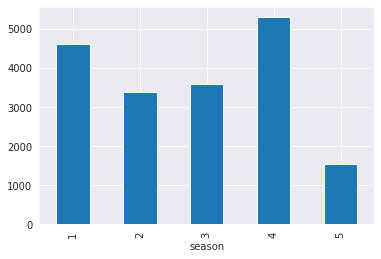

In [ ]:
reviews.plot.bar()

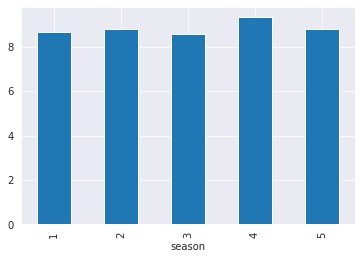

In [ ]:
avg_rating.plot.bar()

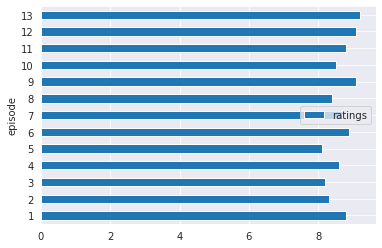

In [ ]:
season1 = data.loc[data.season == 1,:]
season1.plot(y='ratings', x='episode', kind='barh')

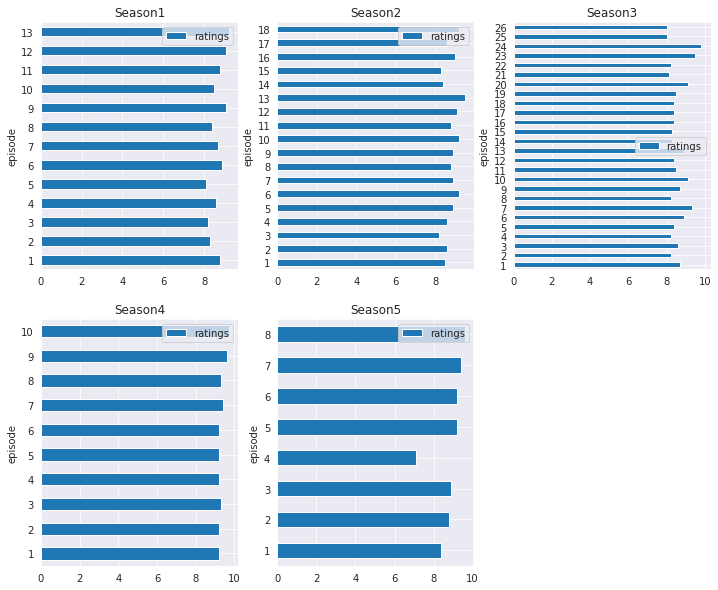

In [ ]:
plt.figure(figsize=(12,10))
for i in range(1,6):
  plt.subplot(2, 3, i)
  seasoni = data.loc[data.season==i, :]
  seasoni.plot(x='episode', y='ratings', kind='barh', ax=plt.gca())
  plt.title('Season'+str(i))


* Season 1 : First the ratings getting decreases and in middle two episode's ratings instanly increases may be due to some story twist and at ends it start getting increase
* Season 2: It's randomly fluctuating in a small range. So pattern appears.
* Season 3: it is also pretty much same across the season but some episodes have a huge jump.
* Season 4: it is just increasing little bit with every episode.
* Season 5: increaseing a little bit everytime with one huge drop in middle.

# now lets see if no. of reviews can expliain anything.

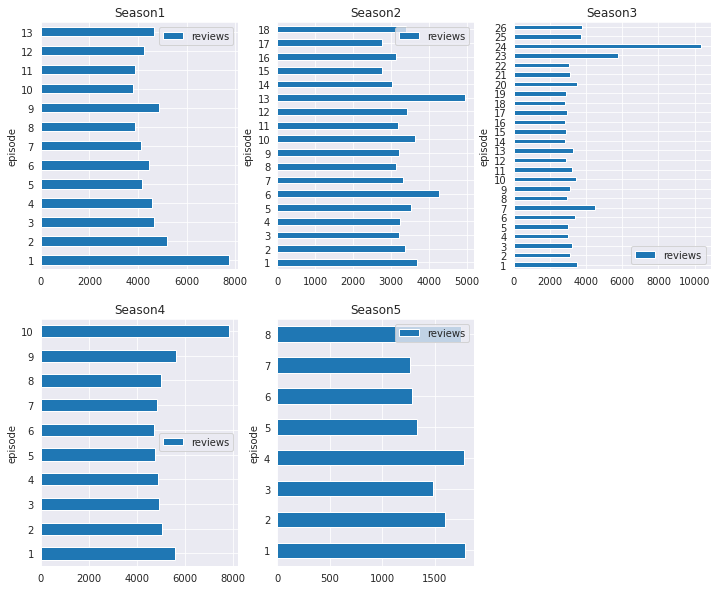

In [ ]:
plt.figure(figsize=(12,10))
cor = []
for i in range(1,6):
  plt.subplot(2, 3, i)
  seasoni = data.loc[data.season==i, :]
  corrr = seasoni['ratings'].corr(seasoni['reviews'])
  cor.append(corrr)
  seasoni.plot(x='episode', y='reviews', kind='barh', ax=plt.gca())
  plt.title('Season'+str(i))

Reviews are fluctuating a lot.
* Season 1: 1st episode have approx. 60% more reviews than any other episode of the same season. Means many viewers stoped watching after first episode.[5000-3000]
* Season 2: slitely decreasing with episode with one exception.[ 2800 - 3800]
* Season 3: pretty much same as season 3 with one exception. [3000-4000]
* Season 4: slitly decresing than increasing and final episode exceptionly high. [5000-5800]
* Sesaon 5: decreasing contineously.[1300-1800] . The reason for low range becuase its very new.